## Library Imports 

In [63]:
import numpy as np
import matplotlib.pyplot as plt


### Generic Function for Membership Functions

In [64]:
class MembershipFunction:
    def __init__(self, name):
        self.name = name

    def compute(self, x):
        raise NotImplementedError("Debe implementarse en una subclase.")

### Diferents Shapes


1. Triangular

[Función Triangular](img/1.png)

In [65]:

class TriangularMF(MembershipFunction):
    def __init__(self, name, a, b, c):
        super().__init__(name)
        self.a = a
        self.b = b
        self.c = c

    def compute(self, x):
        if x < self.a or x > self.c:
            return 0
        elif self.a <= x < self.b:
            return (x - self.a) / (self.b - self.a)
        elif self.b <= x <= self.c:
            return (self.c - x) / (self.c - self.b)
    
    def __str__(self):
        return f"Triangular Membership Function  named {self.name} was created with: a = {self.a}, b = {self.b}, c =  {self.c} "
    

    def plot(self, resolution=100):
        x = np.linspace(self.a - 1, self.c + 1, resolution) 
        y = [self.compute(xi) for xi in x]
        
        plt.plot(x, y, label=f"MF: {self.name}")
        plt.title(f"Triangular Membership Function: {self.name}")
        plt.xlabel("x")
        plt.ylabel("Membership Degree")
        plt.grid(True)
        plt.legend()
        plt.show()

In [66]:
cold=TriangularMF('slow',10,20,40)

print(cold)

Triangular Membership Function  named slow was created with: a = 10, b = 20, c =  40 


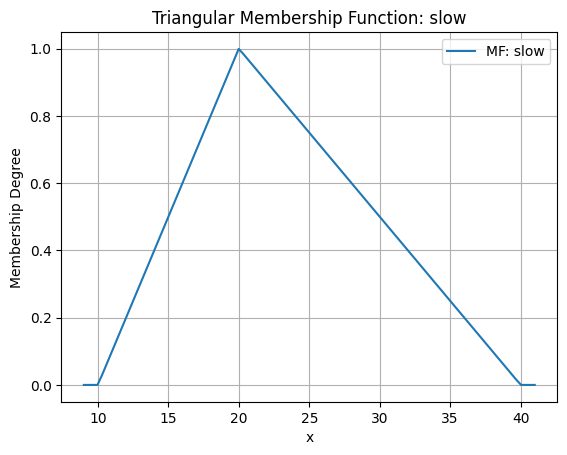

In [67]:
cold.plot()

2. Trapezoidal

In [68]:
class TrapezoidalMF(MembershipFunction):
    def __init__(self, name, a, b, c, d):
        super().__init__(name)
        self.a = a
        self.b = b
        self.c = c
        self.d = d

    def compute(self, x):
        if x < self.a or x > self.d:
            return 0
        elif self.a <= x < self.b:
            return (x - self.a) / (self.b - self.a)
        elif self.b <= x <= self.c:
            return 1
        elif self.c < x <= self.d:
            return (self.d - x) / (self.d - self.c)
    
    def __str__(self):
        return f"Trapezoidal Membership Function named {self.name} was created with: a = {self.a}, b = {self.b}, c =  {self.c}, d =  {self.d} "
    

    def plot(self, resolution=100):
        x = np.linspace(self.a - 1, self.d + 1, resolution) 
        y = [self.compute(xi) for xi in x]
        
        plt.plot(x, y, label=f"MF: {self.name}")
        plt.title(f"Triangular Membership Function: {self.name}")
        plt.xlabel("x")
        plt.ylabel("Membership Degree")
        plt.grid(True)
        plt.legend()
        plt.show()

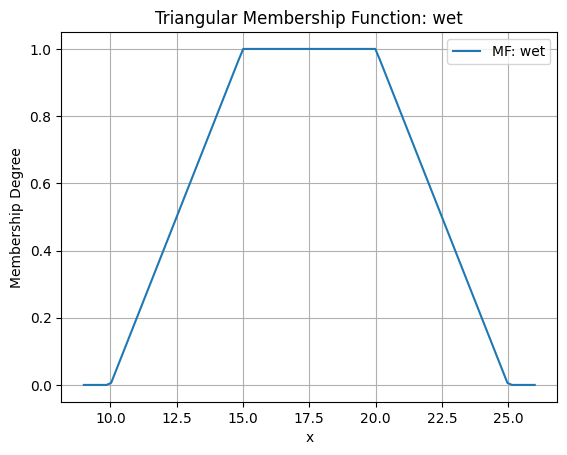

In [69]:
wet=TrapezoidalMF('wet', 10,15,20,25)

wet.plot()

In [70]:
class GaussianMF(MembershipFunction):
    def __init__(self, name, a, b, c):
        super().__init__(name)
        self.a = a  
        self.b = b 
        self.c = c  

    def compute(self, x):
        return self.a * np.exp(-0.5 * ((x - self.b) / self.c) ** 2)
    
    def __str__(self):
        return f"Gaussian Membership Function named {self.name} was created with: a = {self.a}, b = {self.b}, c =  {self.c}"
    

    def plot(self, resolution=100):
        x = np.linspace(self.b - 3 * self.c, self.b + 3 * self.c, resolution)  # Rango centrado en la media
        y = [self.compute(xi) for xi in x]
        
        plt.plot(x, y, label=f"MF: {self.name}")
        plt.title(f"Gaussian Membership Function: {self.name}")
        plt.xlabel("x")
        plt.ylabel("Membership Degree")
        plt.grid(True)
        plt.legend()
        plt.show()


### Example Triangular 

Triangular Membership Function  named cold was created with: a = 0, b = 10, c =  20 


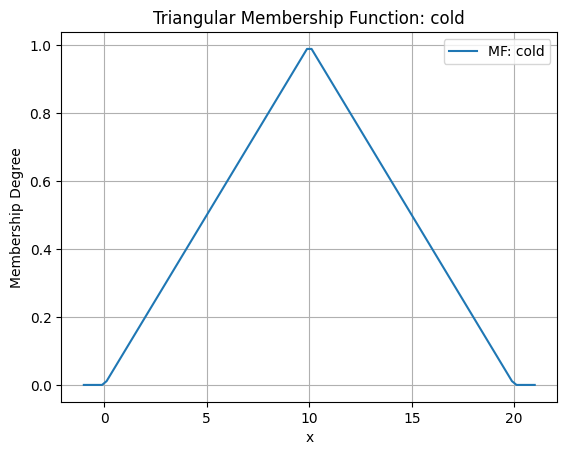

In [71]:
cold = TriangularMF("cold", 0, 10, 20)
print(cold)
cold.plot()

### Example Trapezoidal 

Trapezoidal Membership Function named hot was created with: a = 20, b = 30, c =  40, d =  50 


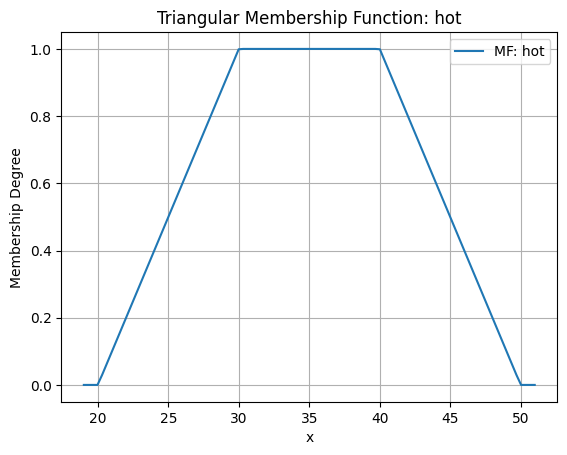

In [72]:
hot = TrapezoidalMF("hot", 20, 30, 40, 50)
print(hot)
hot.plot()

### Example Gaussian 

Gaussian Membership Function named warm was created with: a = 1, b = 20, c =  5


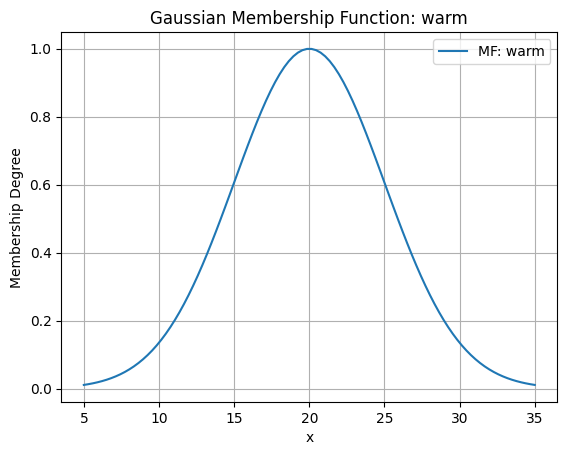

In [73]:
warm = GaussianMF("warm", 1, 20, 5)
print(warm)
warm.plot()

### Function to create a termset

In [74]:
class TermSet:
     
    def __init__(self,variable_name, universe_min=0, universe_max=100):
        self.variable_name=variable_name
        self.terms=[]
        self.universe_min=universe_min
        self.universe_max=universe_max
        
    def add_term(self,membership_function):
        self.terms.append(membership_function)
    
    def plot(self, resolution=100):
          x = np.linspace(self.universe_min, self.universe_max, resolution)
          plt.figure(figsize=(10, 6))
          for term in self.terms:
                y = [term.compute(xi) for xi in x]
                plt.plot(x, y, label=term.name)
                
          plt.title(f"Termset for {self.variable_name}")
          plt.xlabel(self.variable_name)
          plt.ylabel("Grade of Membership")
          plt.legend()
          plt.grid(True)
          plt.show()
    def to_dict(self):
        return {term.name: term for term in self.terms}
        
        

### Temperature Fuzzy Variable

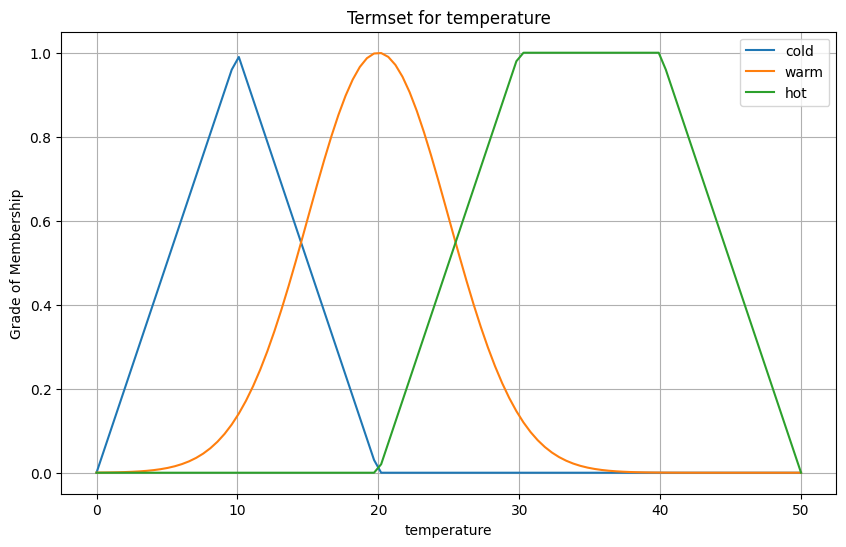

In [75]:
temperature_terms = TermSet("temperature", universe_min=0, universe_max=50)

temperature_terms.add_term(cold)
temperature_terms.add_term(warm)
temperature_terms.add_term(hot)

temperature_terms.plot()

### Humidity Fuzzy Variable

In [76]:
low_humidity = TriangularMF("dry", 0, 20, 40)
medium_humidity = TrapezoidalMF("normal", 30, 40, 60, 70)
high_humidity = GaussianMF("wet", 1, 80, 10)

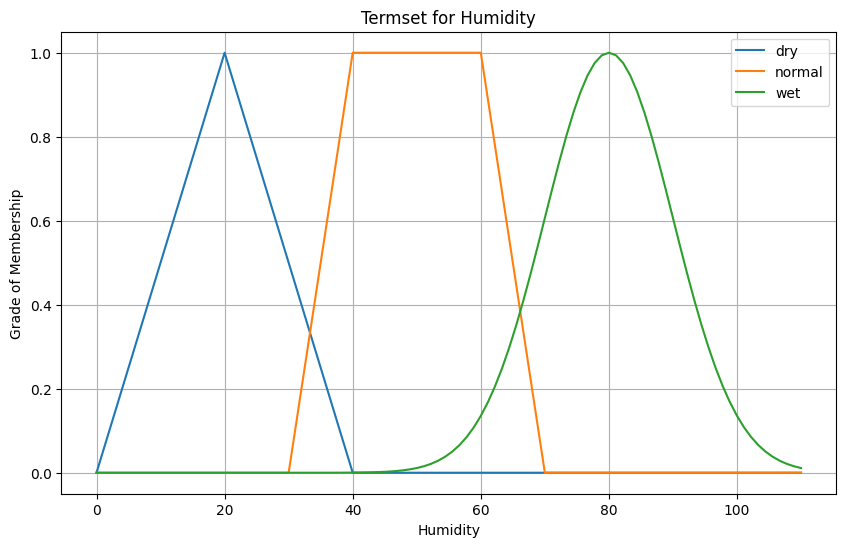

In [77]:
humidity_terms = TermSet("Humidity", universe_min=0, universe_max=110)

humidity_terms.add_term(low_humidity)
humidity_terms.add_term(medium_humidity)
humidity_terms.add_term(high_humidity)

humidity_terms.plot()

### Output Velocity

In [78]:
low_velocity = TriangularMF("low", 0, 12, 30)
medium_velocity = TrapezoidalMF("medium", 22, 40, 50, 70)
high_velocity = GaussianMF("high", 1,80 , 10)

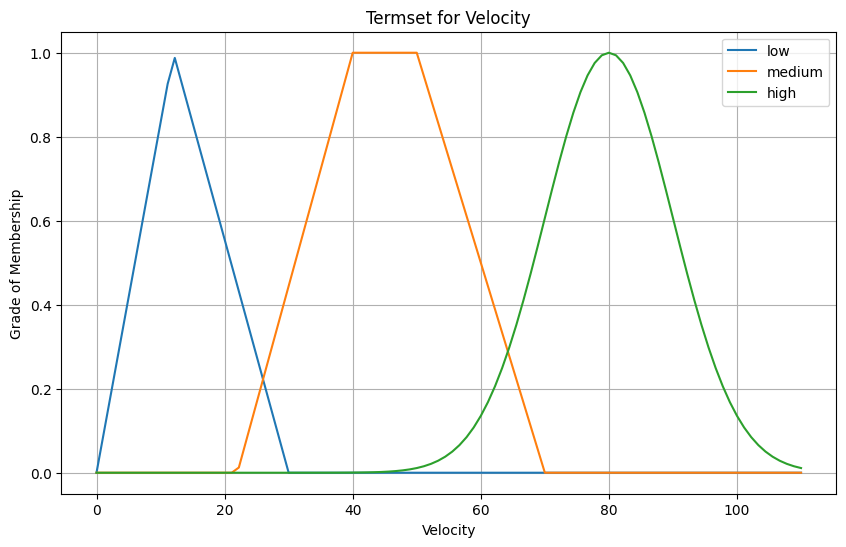

In [79]:
velocity_terms = TermSet("Velocity", universe_min=0, universe_max=110)

velocity_terms.add_term(low_velocity)
velocity_terms.add_term(medium_velocity)
velocity_terms.add_term(high_velocity)

velocity_terms.plot()


In [80]:
temperature_dict = temperature_terms.to_dict()
humidity_dict = humidity_terms.to_dict()
velocity_dict = velocity_terms.to_dict()

In [81]:
print("Términos de temperatura:", temperature_dict.keys())
print("Términos de humedad:", humidity_dict.keys())
print("Términos de velocidad:", velocity_dict.keys())

Términos de temperatura: dict_keys(['cold', 'warm', 'hot'])
Términos de humedad: dict_keys(['dry', 'normal', 'wet'])
Términos de velocidad: dict_keys(['low', 'medium', 'high'])


In [82]:
class MamdaniRule:
    def __init__(self, antecedent, consequent):
      
        self.antecedent = antecedent
        self.consequent = consequent

    def __str__(self):
        antecedent_str = " y ".join(f"{var} es {term.name}" for var, term in self.antecedent)
        return f"Si {antecedent_str}, entonces salida es {self.consequent.name}."

In [83]:
class RuleGenerator:
    def __init__(self, input_termsets, output_termsets):
     
        self.input_termsets = input_termsets
        self.output_termsets = output_termsets
        self.rules = []

    def add_rule(self, antecedent_conditions, output_term):
     
        antecedent = []
        for var, term_name in antecedent_conditions:
            if var not in self.input_termsets:
                raise ValueError(f"Variable '{var}' no encontrada en los termsets.")
            term = self.input_termsets[var].get(term_name)
            if not term:
                raise ValueError(f"Término '{term_name}' no válido para la variable '{var}'.")
            antecedent.append((var, term))

        consequent = self.output_termsets.get(output_term)
        if not consequent:
            raise ValueError(f"Término de salida '{output_term}' no válido.")

        # Crear la regla y agregarla
        rule = MamdaniRule(antecedent, consequent)
        self.rules.append(rule)

    
    def list_rules(self):
        """
        Lista todas las reglas definidas.
        """
        print("\nReglas definidas:")
        for i, rule in enumerate(self.rules, 1):
            antecedent_str = " y ".join(
                f"{var} es {term.name}" for var, term in rule.antecedent
            )
            print(f"Regla {i}: Si {antecedent_str}, entonces salida es {rule.consequent.name}.")


In [84]:
rule_generator = RuleGenerator(
    input_termsets={
        "temperature": temperature_dict,
        "humidity": humidity_dict,
    },
    output_termsets=velocity_dict
)

In [85]:
rule_generator.add_rule(
    antecedent_conditions=[("temperature", "cold"), ("humidity", "wet")],
    output_term="low"
)
rule_generator.add_rule(
    antecedent_conditions=[("temperature", "hot"), ("humidity", "dry")],
    output_term="high"
)
rule_generator.add_rule(
    antecedent_conditions=[("temperature", "warm"), ("humidity", "wet")],
    output_term="high"
)

In [86]:
rule_generator.list_rules()


Reglas definidas:
Regla 1: Si temperature es cold y humidity es wet, entonces salida es low.
Regla 2: Si temperature es hot y humidity es dry, entonces salida es high.
Regla 3: Si temperature es warm y humidity es wet, entonces salida es high.
